In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
df=pd.read_csv('/drive/My Drive/kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
df.drop(['id','date','zipcode'],axis=1,inplace=True)

In [ ]:
df2=df

In [ ]:
df2.shape

(21613, 18)

In [ ]:
col=df2[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
          'grade', 'sqft_above',
       'sqft_basement', 'long',
       'sqft_living15', 'sqft_lot15']]

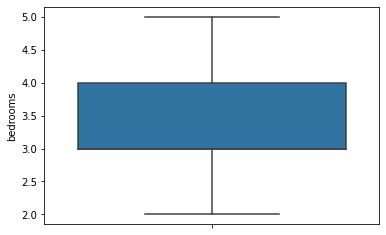

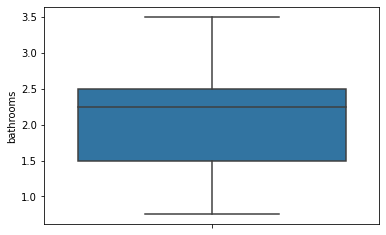

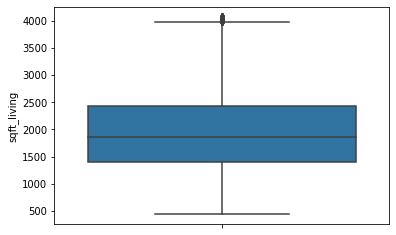

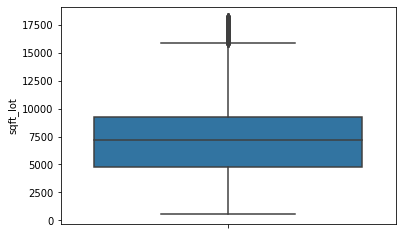

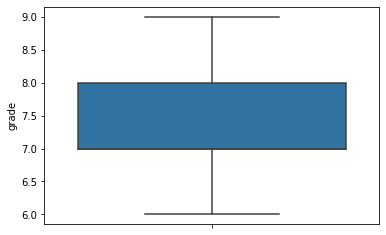

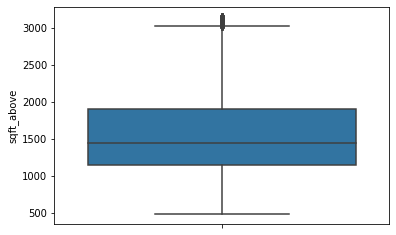

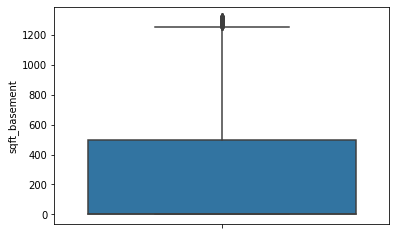

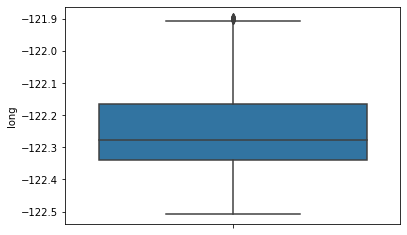

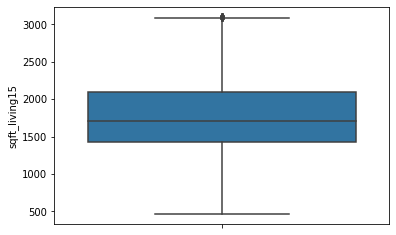

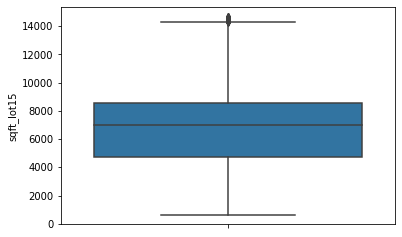

In [ ]:
for c in col:
  percentile25=df2[c].quantile(0.25)
  percentile75=df2[c].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+(1.5*iqr)
  lower_limit=percentile25-(1.5*iqr)
  df2=df2[df2[c]<=upper_limit]
  df2=df2[df2[c]>=lower_limit]
  plt.figure()
  sns.boxplot(y=c, data=df2)

In [ ]:
df2['No_constructuin']=df.apply(lambda i:i.grade<4,axis=1)

In [ ]:
df2['avg_constructuin']=df.apply(lambda i:i.grade==7,axis=1)

In [ ]:
df2['high_constructuin']=df.apply(lambda i:i.grade>7,axis=1)

In [ ]:
df2['low_constructuin']=df.apply(lambda i:i.grade>4 and i.grade<7,axis=1)

In [ ]:
df2.rename(columns={'No_constructuin':'No_Construction','low_constructuin':'low_Construction',
                    'high_constructuin':'high_Construction','avg_constructuin':'avg_Construction'


},inplace=True)

In [ ]:
df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,No_Construction,avg_Construction,high_Construction,low_Construction
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,47.5112,-122.257,1340,5650,False,True,False,False
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,47.7210,-122.319,1690,7639,False,True,False,False
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,47.7379,-122.233,2720,8062,False,False,False,True
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,47.5208,-122.393,1360,5000,False,True,False,False
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,47.6168,-122.045,1800,7503,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,2009,0,47.6993,-122.346,1530,1509,False,False,True,False
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,2014,0,47.5107,-122.362,1830,7200,False,False,True,False
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,2009,0,47.5944,-122.299,1020,2007,False,True,False,False
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,2004,0,47.5345,-122.069,1410,1287,False,False,True,False


In [ ]:
df2.dtypes

price                float64
bedrooms               int64
bathrooms            float64
sqft_living            int64
sqft_lot               int64
floors               float64
waterfront             int64
view                   int64
condition              int64
grade                  int64
sqft_above             int64
sqft_basement          int64
yr_built               int64
yr_renovated           int64
lat                  float64
long                 float64
sqft_living15          int64
sqft_lot15             int64
No_Construction         bool
avg_Construction        bool
high_Construction       bool
low_Construction        bool
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
label=['No_Construction','low_Construction','avg_Construction','high_Construction']

In [ ]:
for c in label:
  df2[c]=le.fit_transform(df2[c])

In [ ]:
df3=df2.drop('grade',axis='columns')

In [ ]:
df3.shape

(15651, 21)

#Cleaned Data

In [ ]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,No_Construction,avg_Construction,high_Construction,low_Construction
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,47.5112,-122.257,1340,5650,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,47.7210,-122.319,1690,7639,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,47.7379,-122.233,2720,8062,0,0,0,1
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,47.5208,-122.393,1360,5000,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,47.6168,-122.045,1800,7503,0,0,1,0


In [ ]:
df3.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'No_Construction', 'avg_Construction',
       'high_Construction', 'low_Construction'],
      dtype='object')

In [ ]:
df3.to_csv('Cleaned_data.csv')

In [ ]:
x=df3[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'No_Construction', 'avg_Construction',
       'high_Construction', 'low_Construction']]

In [ ]:
y=df3['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=43)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)



#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
reg.score(x_test,y_test)

0.8458103805530048

In [ ]:
y_pred_rf2=reg.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred_rf2)

0.8458103805530048

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
cross_val_score(RandomForestRegressor(),x,y,cv=cv)

array([0.83981678, 0.83415516, 0.83611107, 0.84777737, 0.83777256])

In [ ]:
import pickle

In [ ]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,No_Construction,avg_Construction,high_Construction,low_Construction
0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,47.5112,-122.257,1340,5650,0,1,0,0
1,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,47.7210,-122.319,1690,7639,0,1,0,0
2,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,47.7379,-122.233,2720,8062,0,0,0,1
3,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0,47.5208,-122.393,1360,5000,0,1,0,0
4,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0,47.6168,-122.045,1800,7503,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,1530,0,2009,0,47.6993,-122.346,1530,1509,0,0,1,0
21609,4,2.50,2310,5813,2.0,0,0,3,2310,0,2014,0,47.5107,-122.362,1830,7200,0,0,1,0
21610,2,0.75,1020,1350,2.0,0,0,3,1020,0,2009,0,47.5944,-122.299,1020,2007,0,1,0,0
21611,3,2.50,1600,2388,2.0,0,0,3,1600,0,2004,0,47.5345,-122.069,1410,1287,0,0,1,0


In [ ]:
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'No_Construction', 'avg_Construction',
       'high_Construction', 'low_Construction'],
      dtype='object')

In [ ]:
np.where(x.columns=='No_Construction')[0][0]


16

In [ ]:
def predict_price(grade,sqft_living,bathrooms,bedrooms):
  loc_index=np.where(x.columns==grade)[0][0]

  X=np.zeros(len(x.columns))
  X[0]=sqft_living
  X[1]=bathrooms
  X[2]=bedrooms
  if loc_index >=0:
    X[loc_index]=1


  return reg.predict([X])[0]

In [ ]:
predict_price('low_Construction',1680,2,3)

675501.0

In [ ]:
predict_price('high_Construction',12050,8,6)

727257.57

In [ ]:
import pickle
with open('Seattle_home_price_model.pickle','wb') as f:
  pickle.dump(reg,f)


In [ ]:
import json
columns={
    'data_columns':[col.lower() for col in x.columns]
}
with open('columns.json','w') as f:
  f.write(json.dumps(columns))